<a href="https://colab.research.google.com/github/thotasriharsha/Explainable-AI-/blob/main/EAI_ASS1_2159.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

question 1

In [1]:
import pandas as pd
from sklearn.linear_model import LinearRegression
df = pd.DataFrame({
"PushNotificationsSent": [1, 2, 3, 1, 2],
"WorkoutSessions": [25, 35, 42, 28, 38]
})
X, y = df[["PushNotificationsSent"]], df["WorkoutSessions"]
model = LinearRegression().fit(X, y)
baseline = y.mean()
df["Prediction"] = model.predict(X)
df["SHAP"] = df["Prediction"] - baseline
df["Baseline+SHAP"] = baseline + df["SHAP"]
df["Diff"] = df["Prediction"] - y
df["Over/Under"] = df["Diff"].apply(lambda v: "Over" if v > 0 else "Under" if v < 0 else "Exact")
print(df[["PushNotificationsSent", "WorkoutSessions", "Prediction", "SHAP", "Baseline+SHAP", "Over/Under"]])
for i, r in df.iterrows():
    e = "increase" if r.SHAP > 0 else "decrease" if r.SHAP < 0 else "no change"
    print(f"{r.PushNotificationsSent} notifications → {e} of {abs(r.SHAP):.2f} from baseline {baseline:.2f}")

   PushNotificationsSent  WorkoutSessions  Prediction      SHAP  \
0                      1               25   27.142857 -6.457143   
1                      2               35   35.214286  1.614286   
2                      3               42   43.285714  9.685714   
3                      1               28   27.142857 -6.457143   
4                      2               38   35.214286  1.614286   

   Baseline+SHAP Over/Under  
0      27.142857       Over  
1      35.214286       Over  
2      43.285714       Over  
3      27.142857      Under  
4      35.214286      Under  
1 notifications → decrease of 6.46 from baseline 33.60
2 notifications → increase of 1.61 from baseline 33.60
3 notifications → increase of 9.69 from baseline 33.60
1 notifications → decrease of 6.46 from baseline 33.60
2 notifications → increase of 1.61 from baseline 33.60


question 2

In [2]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
data = {
"Gym_Collabs": [2, 1, 3, 0, 2],
"Influencer_Posts": [5, 3, 4, 2, 1],
"Awareness_Score": [70, 55, 80, 40, 50]
}
df = pd.DataFrame(data)
X = df[["Gym_Collabs", "Influencer_Posts"]]
y = df["Awareness_Score"]
model = LinearRegression()
model.fit(X, y)
intercept = model.intercept_
coef = model.coef_
print("Intercept (Baseline before SHAP):", intercept)
print("Coefficients:", coef)
baseline = np.mean(y)
print("Baseline Awareness Score (mean):", baseline)
shap_values = []
predictions = model.predict(X)
for i in range(len(df)):
    shap_gym = coef[0] * (df.loc[i, "Gym_Collabs"] - np.mean(df["Gym_Collabs"]))
    shap_influencer = coef[1] * (df.loc[i, "Influencer_Posts"] - np.mean(df["Influencer_Posts"]))
    shap_values.append((shap_gym, shap_influencer))
for i in range(len(df)):
    shap_gym, shap_inf = shap_values[i]
    reconstructed_pred = baseline + shap_gym + shap_inf
    print(f"\nRecord {i+1}:")
    print(f" Actual Score: {y[i]}")
    print(f" Predicted Score: {predictions[i]:.2f}")
    print(f" Baseline + SHAPs: {reconstructed_pred:.2f}")
    print(f" SHAP (Gym Collabs): {shap_gym:.2f}")
    print(f" SHAP (Influencer Posts): {shap_inf:.2f}")
    diff = predictions[i] - y[i]
    if diff > 0:
        print(f" Model overpredicted by {diff:.2f} points.")
    elif diff < 0:
        print(f" Model underpredicted by {-diff:.2f} points.")
    else:
        print(f" Model predicted exactly.")
print("\nInterpretation Insights:")
print(f"- Baseline awareness score is {baseline:.2f}, meaning without changes in Gym Collabs and Influencer Posts, this is the expected score.")
print("- SHAP values show how much each feature pushes the prediction above/below the baseline.")
print("- Positive SHAP value: increases the predicted score.")
print("- Negative SHAP value: decreases the predicted score.")

Intercept (Baseline before SHAP): 28.651162790697683
Coefficients: [9.06976744 5.27906977]
Baseline Awareness Score (mean): 59.0

Record 1:
 Actual Score: 70
 Predicted Score: 73.19
 Baseline + SHAPs: 73.19
 SHAP (Gym Collabs): 3.63
 SHAP (Influencer Posts): 10.56
 Model overpredicted by 3.19 points.

Record 2:
 Actual Score: 55
 Predicted Score: 53.56
 Baseline + SHAPs: 53.56
 SHAP (Gym Collabs): -5.44
 SHAP (Influencer Posts): 0.00
 Model underpredicted by 1.44 points.

Record 3:
 Actual Score: 80
 Predicted Score: 76.98
 Baseline + SHAPs: 76.98
 SHAP (Gym Collabs): 12.70
 SHAP (Influencer Posts): 5.28
 Model underpredicted by 3.02 points.

Record 4:
 Actual Score: 40
 Predicted Score: 39.21
 Baseline + SHAPs: 39.21
 SHAP (Gym Collabs): -14.51
 SHAP (Influencer Posts): -5.28
 Model underpredicted by 0.79 points.

Record 5:
 Actual Score: 50
 Predicted Score: 52.07
 Baseline + SHAPs: 52.07
 SHAP (Gym Collabs): 3.63
 SHAP (Influencer Posts): -10.56
 Model overpredicted by 2.07 points.


question 3

In [3]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_diabetes
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
X, y = load_diabetes(return_X_y=True, as_frame=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=42)
model = LinearRegression().fit(X_train, y_train)
baseline = y_train.mean()
means = X_train.mean()
preds = model.predict(X_test)
shap_vals = (X_test- means) * model.coef_
shap_sum = shap_vals.sum(axis=1)
df = X_test.copy()
df["Actual"] = y_test
df["Pred"] = preds
df["Baseline+SHAP"] = baseline + shap_sum
df["Over/Under"] = df["Pred"]- df["Actual"]
print("Baseline:", baseline)
print("Coefficients:", dict(zip(X.columns, model.coef_)))
print(df.head())
for i, row in df.head(3).iterrows():
    print(f"\nPatient {i+1}: Pred={row.Pred:.1f}, Actual={row.Actual},Error={row['Over/Under']:.1f}")
    for f in X.columns:
        val = shap_vals.loc[i, f]
        print(f" {f}: {val:+.2f}")

Baseline: 153.73654390934846
Coefficients: {'age': np.float64(37.904021350074835), 'sex': np.float64(-241.96436231273972), 'bmi': np.float64(542.4287585162907), 'bp': np.float64(347.70384391385596), 's1': np.float64(-931.4888458835159), 's2': np.float64(518.0622769833373), 's3': np.float64(163.41998299131063), 's4': np.float64(275.3179015786486), 's5': np.float64(736.1988589046838), 's6': np.float64(48.67065743196508)}
          age       sex       bmi        bp        s1        s2        s3  \
287  0.045341 -0.044642 -0.006206 -0.015999  0.125019  0.125198  0.019187   
211  0.092564 -0.044642  0.036907  0.021872 -0.024960 -0.016658  0.000779   
72   0.063504  0.050680 -0.004050 -0.012556  0.103003  0.048790  0.056003   
321  0.096197 -0.044642  0.051996  0.079265  0.054845  0.036577 -0.076536   
73   0.012648  0.050680 -0.020218 -0.002228  0.038334  0.053174 -0.006584   

           s4        s5        s6  Actual        Pred  Baseline+SHAP  \
287  0.034309  0.032432 -0.005220   219.0 

question 4

Baseline (Mean Final Score): 67.22
Record 1:
 Actual Score : 38
 Predicted Score : 71.29
 From SHAP Formula : 71.29
 Difference : 0.0000
----------------------------------------
Record 2:
 Actual Score : 61
 Predicted Score : 67.44
 From SHAP Formula : 67.44
 Difference : 0.0000
----------------------------------------
Record 3:
 Actual Score : 88
 Predicted Score : 64.43
 From SHAP Formula : 64.43
 Difference : 0.0000
----------------------------------------
Record 4:
 Actual Score : 46
 Predicted Score : 72.30
 From SHAP Formula : 72.30
 Difference : 0.0000
----------------------------------------
Record 5:
 Actual Score : 73
 Predicted Score : 73.64
 From SHAP Formula : 73.64
 Difference : 0.0000
----------------------------------------
Record 6:
 Actual Score : 98
 Predicted Score : 66.60
 From SHAP Formula : 66.60
 Difference : 0.0000
----------------------------------------
Record 7:
 Actual Score : 68
 Predicted Score : 62.30
 From SHAP Formula : 62.30
 Difference : 0.0000
-----

/tmp/ipython-input-552620350.py:49: FutureWarning: The NumPy global RNG was seeded by calling `np.random.seed`. In a future version this function will no longer use the global RNG. Pass `rng` explicitly to opt-in to the new behaviour and silence this warning.
  shap.summary_plot(shap_values.values, X_test, feature_names=X_test.columns)


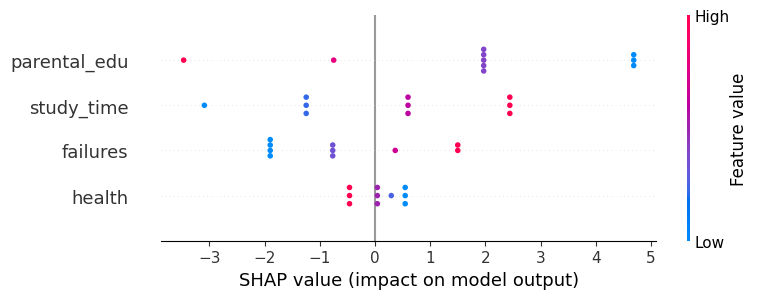

In [4]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import shap
np.random.seed(42)
n = 50
df = pd.DataFrame({
'study_time': np.random.randint(1, 5, n),
'parental_edu': np.random.randint(1, 5, n),
'failures': np.random.randint(0, 4, n),
'health': np.random.randint(1, 6, n),
'final_score': np.random.randint(30, 100, n)
})
X = df.drop('final_score', axis=1)
y = df['final_score']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)
baseline_value = np.mean(y_train)
print(f"Baseline (Mean Final Score): {baseline_value:.2f}")
explainer = shap.Explainer(model, X_train)
shap_values = explainer(X_test)
predictions = model.predict(X_test)
for i in range(len(X_test)):
    shap_sum = np.sum(shap_values.values[i])
    pred_from_shap = baseline_value + shap_sum
    print(f"Record {i+1}:")
    print(f" Actual Score : {y_test.iloc[i]}")
    print(f" Predicted Score : {predictions[i]:.2f}")
    print(f" From SHAP Formula : {pred_from_shap:.2f}")
    print(f" Difference : {abs(predictions[i] - pred_from_shap):.4f}")
    print("-" * 40)
for i in range(len(X_test)):
    print(f"Interpretation for Record {i+1}:")
    for feature_name, shap_val, feature_val in zip(X_test.columns,
                                                   shap_values.values[i],
                                                   X_test.iloc[i]):
        impact = "increased" if shap_val > 0 else "decreased"
        print(f" Feature '{feature_name}' (value={feature_val}) {impact} "
              f"the predicted score by {abs(shap_val):.2f} points.")
    actual = y_test.iloc[i]
    predicted = predictions[i]
    if predicted > actual:
        print(f" Overpredicted by {predicted - actual:.2f} points.")
    else:
        print(f" Underpredicted by {actual - predicted:.2f} points.")
    print("=" * 50)
shap.summary_plot(shap_values.values, X_test, feature_names=X_test.columns)